# Proyecto Final UD2
#### UD2. Aprendizaxe Supervisada
#### MP. Sistemas de Aprendizaxe Automáticos
#### IES de Teis (Vigo), Vanesa Resúa Eiras, Cristina Gómez Alonso

En este proyecto, los alumnos del módulo de Machine Learning deberán demostrar los conocimientos adquiridos durante la UD2 y aplicar al menos dos algoritmos diferentes de aprendizaje supervisado vistos en clase (KNN, Regresión Lineal, Regresión Logística, Árboles de Decisión (o Randm Forest), SVM).

Para ello, tomaremos como referencia el dataset credit_train.csv y credit_test.csv que contienen la información sobre una campaña de márketing llevada a cabo mediante llamadas teléfonicas para captar clientes que quieran acceder a un crédito.

**Features o Input variables:**

1 - age: edad numérica

2 - job : tipo de trabajo (puede tomar los valores: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : estado civil (puede tomar los valores: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education : nivel de estudios (puede tomar los valores: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: ya tiene un crédito solicitado por defecto? (puede tomar los valores: 'no','yes','unknown')

6 - housing: tiene hipoteca? (puede tomar los valores: 'no','yes','unknown')

7 - loan: tiene una cuenta personal? (puede tomar los valores: 'no','yes','unknown')

8 - contact: tipo de comunicación de contacto (puede tomar los valores: 'cellular','telephone')

9 - month: último mes de contacto (puede tomar los valores: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: último día de la semana en el que se le ha contactado (puede tomar los valores: 'mon','tue','wed','thu','fri')

11 - duration: duración del último contacto en segundos (numérico). Importante: este atributo afecta en gran medida a la salida ya que si duration es 0, entonces  la salida es 'no')

12 - campaign: número de veces que se le ha contactado durante la campaña a este cliente (numérico, incluye el último contacto)

13 - pdays: número de días que han pasado desde que el cliente fue contactado por última vez(numérico; 999 significa que no ha sido contactado anteriormente)

14 - previous: número de contactos anteriores a esta campaña a este cliente(numérico)

15 - poutcome: resultado de la última campaña de marketing (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - quarterly indicator (numérico)

17 - cons.price.idx: IPC - indicador mensual (numérico)

18 - cons.conf.idx: índice de confianza de los consumidores - indicador mensual (numérico)

19 - euribor3m: euribor tasa 3 meses - indicador diario (numérico)

20 - nr.employed: número de trabajadores - indicador en porciones  (numérico)

**Output variable (desired target):**

21 - y: Suscripción al crédito por parte del cliente? (binary: 'yes','no')

Los requisitos mínimos de este proyecto consisten en:

* Etapas comunes 1, 2 y 3 de importación, análisis numérico y visual, así como preprocesado.
* Para cada algoritmo que apliques deberás de mantener la siguiente estructura de 5 etapas (del 4-8), pero puedes añadir subapartados o etapas adicionales.
* En cada etapa se deben añadir explicaciones justificativas de lo que se quiere hacer, así como de los resultados obtenidos.
* Como resultado final, se deben contrastar los resultados obtenidos y comparar los algoritmos utilizados indicando claramente cual y porqué obtiene mejor resultados.

Cualificaciones:
- Uso de 2 algoritmos: cualificación máxima de 7 puntos
- Uso de 3 algoritmos: cualificación máxima de 10 puntos.




----------

<div color= #845ef7ff><h2>Justificación de la Selección de Algoritmos</h2></div>

Dado que el objetivo es predecir una variable binaria (Sí/No) sobre la contratación de un producto bancario, nos encontramos ante un problema de **Clasificación Binaria**. Por este motivo, hemos descartado algoritmos de regresión lineal.

Implementaremos los siguientes **tres algoritmos**:

<div style="background-color: #ffe6ea; border-left: 6px solid #ff99ac; padding: 15px; margin-bottom: 20px; border-radius: 5px; color: #5a5a5a;">
    <h4 style="color: #d63384;">1. K-Nearest Neighbors (KNN)</h4>
    <ul>
        <li><b>Por qué lo elegi:</b> Es un algoritmo basado en distancias. Su lógica es muy intuitiva: busca a los clientes más "parecidos" (neighbors) al que queremos analizar.</li>
        <li><b>Lógica:</b> Si los clientes con perfil similar (edad, dinero, trabajo) contrataron el crédito, es probable que este también lo haga.</li>
    </ul>
</div>
<div style="background-color: #fff0f5; border-left: 6px solid #e64980; padding: 15px; margin-bottom: 20px; border-radius: 5px; color: #5a5a5a;">
    <h4 style="color: #a61e4d;">2. Regresión Logística</h4>
    <ul>
        <li><b>Por qué lo elegi:</b> Es el modelo base por excelencia para temas de industria bancaria y marketing.</li>
        <li><b>Ventaja:</b> Permite establecer una línea base de rendimiento. Además, no solo clasifica, sino que nos da la <b>probabilidad matemática exacta</b> (ej: "Cliente tiene un 85% de probabilidad de aceptar"), lo cual es útil para priorizar llamadas en una campaña de marketing.</li>
    </ul>
</div>
<div style="background-color: #f3e6ff; border-left: 6px solid #b197fc; padding: 15px; margin-bottom: 20px; border-radius: 5px; color: #5a5a5a;">
    <h4 style="color: #845ef7ff;">3. Random Forest</h4>
    <ul>
        <li><b>Por qué lo elegi:</b> Es la evolución robusta de los Árboles de Decisión(con el objetivo de reducir el overfitting).</li>
        <li><b>Ventaja Principal:</b> Mientras que un Árbol de Decisión simple tiende a memorizar datos (overfitting), el Random Forest generaliza mucho mejor y suele ofrecer la <b>mayor precisión</b> en datos tabulares complejos con mezclas de variables numéricas y categóricas como este.</li>
    </ul>
</div>

------

## 1. Importación de paquetes y dataset

Importación del dataset

In [1]:
# --- LIBRERÍAS BÁSICAS ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# --- PREPROCESADO ---
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.tree import plot_tree

# --- MODELOS  ---
from sklearn.neighbors import KNeighborsClassifier       # KNN
from sklearn.linear_model import LogisticRegression      # Regresión Logística
from sklearn.ensemble import RandomForestClassifier      # Random Forest

# ---  MÉTRICAS  ---
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

df_train = pd.read_csv("credit-train.csv")
df_test = pd.read_csv("credit-test.csv")
df_train.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


-------

## 2.EDA y Visual EDA

Comenzamos cargando el conjunto de datos de entrenamiento. Mediante .info() y .describe(),

In [2]:
print("--- Información del Dataset ---")
df_train.info()

--- Información del Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17 

<div style="background-color: #ff69b4; border-left: 6px solid #ff69b4; padding: 15px; border-radius: 5px; color: #5a5a5a;">
    <p>Tras la carga inicial, realizamos una inspección técnica con <code>.info()</code> observando:</p>
    <ul>
        <li><b>Volumen de Datos:<b>41.188 registros</b> (filas) y <b>21 columnas</b>
        <li><b>Tipos de Variables:</b> Existe una mezcla equilibrada:
            <ul>
                <li><b>11 Variables Numéricas</b> (<i>int64, float64</i>): Como <code>age</code>, <code>duration</code>, <code>euribor3m</code>.</li>
                <li><b>10 Variables Categóricas</b> (<i>object</i>): Como <code>job</code>, <code>education</code>, <code>marital</code>. Estas requerirán un preprocesado para que los modelos puedan interpretarlas.</li>
            </ul>
        </li>
        <li><b>Calidad del Dato (Valores Nulos):</b> A primera vista, la función indica que no existen valores nulos (<i>non-null</i>) en ninguna columna. Sin embargo, <b>debemos ser cautos</b>: en este tipo de datasets bancarios es común que los valores perdidos estén camuflados bajo la etiqueta de texto <i>"unknown"</i>, por lo que realizaremos una comprobación específica más adelante.</li>
        <li><b>Target:</b> La variable objetivo es <code>y</code></li>
    </ul>
</div>

In [3]:
print("\n--- Descripción Estadística ---")
display(df_train.describe())



--- Descripción Estadística ---


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


<div style="background-color: #fac2f1ff; border-left: 6px solid #cf5d83ff; padding: 15px; border-radius: 5px; color: #5a5a5a;">
    <h3 style="color: #c54c8dff;">Interpretación de Estadísticos Descriptivos</h3>
    <ul>
        <li><b>Anomalía en <code>pdays</code>:</b> Observamos que los percentiles 25%, 50% y 75% tienen el valor <b>999</b>. Esto indica que la gran mayoría de clientes no fueron contactados previamente (999 es un código, no una cantidad real de días). Esto distorsiona la media (962.4) y deberá ser tenido en cuenta, más adelante</li>
        <li><b>Outliers en <code>campaign</code>:</b> Aunque el promedio de llamadas es de 2.5, existe un valor máximo de <b>56 llamadas</b> a un solo cliente, lo cual es un caso extremo (outlier) evidente.</li>
        <li><b>Desbalanceo de Clases (Variable <code>y</code>):</b> La media de la variable objetivo es <b>0.11</b>. Al ser una variable binaria (0/1), esto confirma que solo el <b>11%</b> de los clientes aceptaron el crédito (clase positiva minoritaria).</li>
    </ul>
</div>

In [4]:
df_train.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [5]:
# Comprobamos si hay valores 'unknown'
nulos_reales = (df_train == 'unknown').sum()

print("--- VALORES PERDIDOS (Etiquetados como 'unknown') ---")
# Filtramos solo las columnas que tengan algo
print(nulos_reales[nulos_reales > 0])

--- VALORES PERDIDOS (Etiquetados como 'unknown') ---
job           330
marital        80
education    1731
default      8597
housing       990
loan          990
dtype: int64



<div style="background-color: #907ee2ff; border-left: 6px solid #6b49e7ff; padding: 15px; border-radius: 5px; color: #000000ff;">
    <h3 style="color: #4c196eff;">Detección de Valores Ocultos</h3>
    <ul>
        <li><b>El problema de <code>default</code>:</b> Encontramos <b>8.597 registros</b> desconocidos en la variable de impago. Una porción muy significativa del dataset (aprox. 20%).
            <br><i>Impacto:</i> Eliminar estas filas supondría una pérdida masiva de información. La estrategia más prudente será tratar "unknown" como una categoría propia o imputarla
        </li>
        <li><b>Educación:</b> La variable <code>education</code> presenta <b>1.731</b> valores perdidos, lo cual es relevante dado que el nivel educativo suele estar correlacionado con el éxito económico.</li>
        <li><b>Otras Variables:</b> En casos como <code>job</code> (330) o <code>marital</code> (80), el impacto es menor y podríamos optar por técnicas de imputación por la moda (valor más frecuente) si fuera necesario.</li>
    </ul>
    <p><b>Conclusión:</b> es necesario realizar una etapa de limpieza específica para gestionar estos valores antes de entrenar los modelos.</p>
</div>

### VISUAL EDA

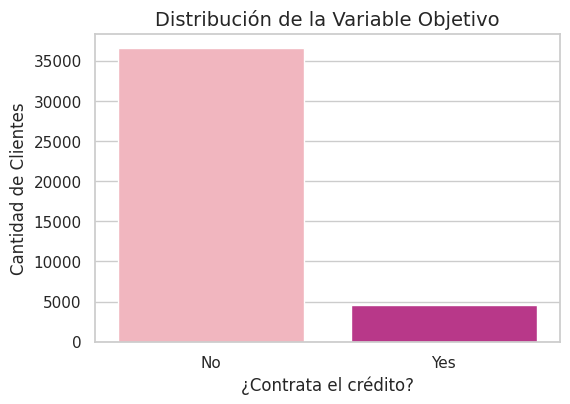

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))

sns.countplot(x='y', hue='y', data=df_train, palette='RdPu', legend=False)


plt.xticks([0, 1], ['No', 'Yes']) 

plt.title('Distribución de la Variable Objetivo', fontsize=14)
plt.xlabel('¿Contrata el crédito?')
plt.ylabel('Cantidad de Clientes')
plt.show()

<div style="background-color: #fff0f5; padding: 20px; border: 1px solid #ffdeeb; border-left: 5px solid #d63384; border-radius: 5px;">
    <h3 style="color: #a61e4d; margin-top: 0; border-bottom: 2px solid #ffdeeb; padding-bottom: 10px;">
        Análisis de la Variable Objetivo (Target)
    </h3>
    <p style="color: #555; font-family: sans-serif;">
        En el gráfico anterior observamos la distribución de la variable <b>y</b>, la cual indica si el cliente contrató o no.
    </p>
    <div style="background-color: white; padding: 15px; border-radius: 5px; border-left: 3px solid #ffa8a8; margin: 15px 0;">
        <p style="margin: 0 0 10px 0; color: #555;">
            <b style="color: #d63384;">BARRA ALTA (Rosa Claro):</b><br>
            Representa a la gran mayoría de clientes que <b>rechazaron</b> la oferta.
        </p>
        <p style="margin: 0; color: #555;">
            <b style="color: #d63384;">BARRA PEQUEÑA (Rosa Fuerte):</b><br>
            Representa a la minoría que <b>aceptó</b> el crédito.
        </p>
    </div>
    <p style="color: #555; font-family: sans-serif;">
        Este desequilibrio nos indica que <b>no podemos fiarnos únicamente de la métrica de Accuracy</b> (Precisión Global).
    </p>
    <p style="color: #666; font-style: italic; font-size: 0.9em; margin-bottom: 15px;">
        Ejemplo: Si el modelo predijera "No" para todos los clientes, acertaría el 89% de las veces, pero sería inútil para el negocio porque no detectaría ningún cliente potencial.
    </p>
    

</div>

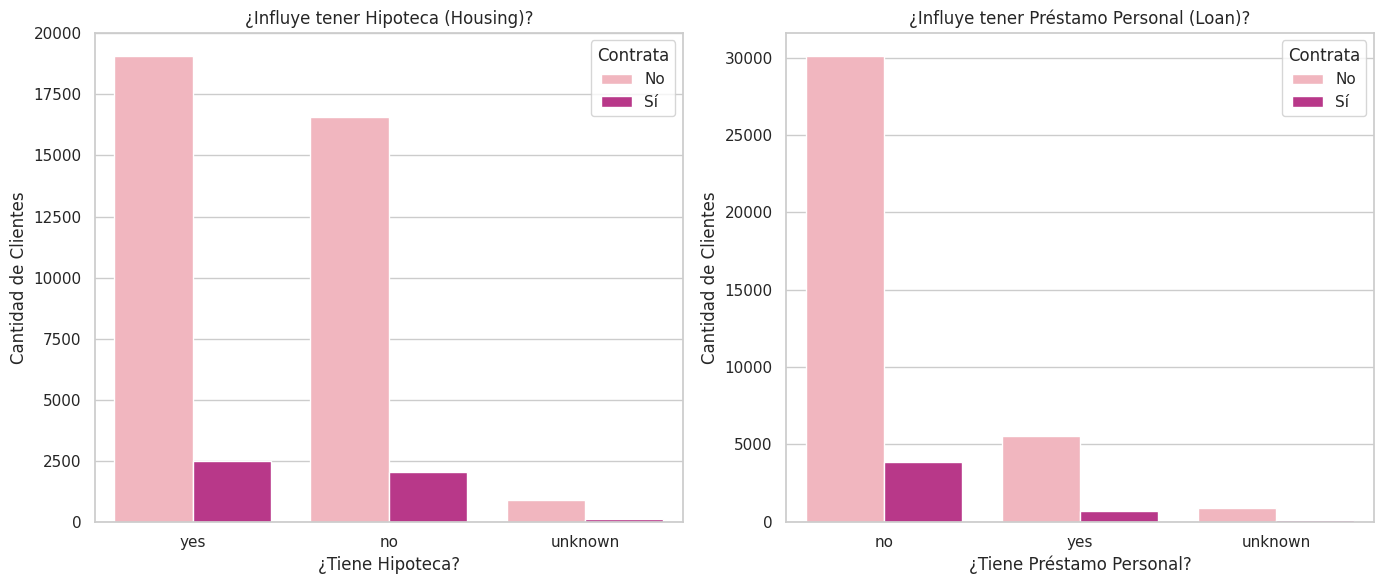

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# GRÁFICA 1: Hipoteca (Housing) vs Resultado
sns.countplot(x='housing', hue='y', data=df_train, palette='RdPu', ax=ax[0])
ax[0].set_title('¿Influye tener Hipoteca (Housing)?')
ax[0].set_xlabel('¿Tiene Hipoteca?')
ax[0].set_ylabel('Cantidad de Clientes')
ax[0].legend(title='Contrata', labels=['No', 'Sí'])

# GRÁFICA 2: Préstamo Personal (Loan) vs Resultado
sns.countplot(x='loan', hue='y', data=df_train, palette='RdPu', ax=ax[1])
ax[1].set_title('¿Influye tener Préstamo Personal (Loan)?')
ax[1].set_xlabel('¿Tiene Préstamo Personal?')
ax[1].set_ylabel('Cantidad de Clientes')
ax[1].legend(title='Contrata', labels=['No', 'Sí'])

plt.tight_layout()
plt.show()

<div style="background-color: #fff0f5; border: 1px solid #ffdeeb; border-left: 5px solid #d63384; border-radius: 5px; padding: 20px; font-family: sans-serif; line-height: 1.6; color: #555;">

<h3 style="color: #a61e4d; margin-top: 0; border-bottom: 2px solid #ffdeeb; padding-bottom: 10px;">
        Impacto de Deudas Previas
    </h3>

<p style="margin-bottom: 20px;">
        Hemos analizado si tener cargas financieras previas influye en la decisión de contratar:
    </p>

<div style="background-color: white; padding: 15px; border-radius: 5px; border-left: 3px solid #ffadd2; margin-bottom: 15px; box-shadow: 0 2px 4px rgba(0,0,0,0.02);">
        <h4 style="color: #d63384; margin-top: 0; margin-bottom: 5px;">1. Hipoteca (<code>housing</code>)</h4>
        <ul style="margin-top: 5px; margin-bottom: 0; padding-left: 20px;">
            <li style="margin-bottom: 5px;">La gran mayoría de los clientes del banco <b>SÍ tienen una hipoteca</b> en vigor.</li>
            <li><b>Observación:</b> Visualmente, la proporción de clientes que contratan se mantiene estable, independientemente de si tienen hipoteca o no. Esto sugiere que tener una casa pagada o no, no es un factor determinante para este producto.</li>
        </ul>
    </div>

<div style="background-color: white; padding: 15px; border-radius: 5px; border-left: 3px solid #ffadd2; margin-bottom: 20px; box-shadow: 0 2px 4px rgba(0,0,0,0.02);">
        <h4 style="color: #d63384; margin-top: 0; margin-bottom: 5px;">2. Préstamo Personal (<code>loan</code>)</h4>
        <ul style="margin-top: 5px; margin-bottom: 0; padding-left: 20px;">
            <li style="margin-bottom: 5px;">A diferencia de la hipoteca, la mayoría de clientes <b>NO tienen préstamos personales</b>.</li>
            <li><b>Observación:</b> Aquellos que no tienen préstamos personales parecen ligeramente más inclinados a contratar, posiblemente debido a una mayor capacidad de ahorro...</li>
        </ul>
</div>

</div>

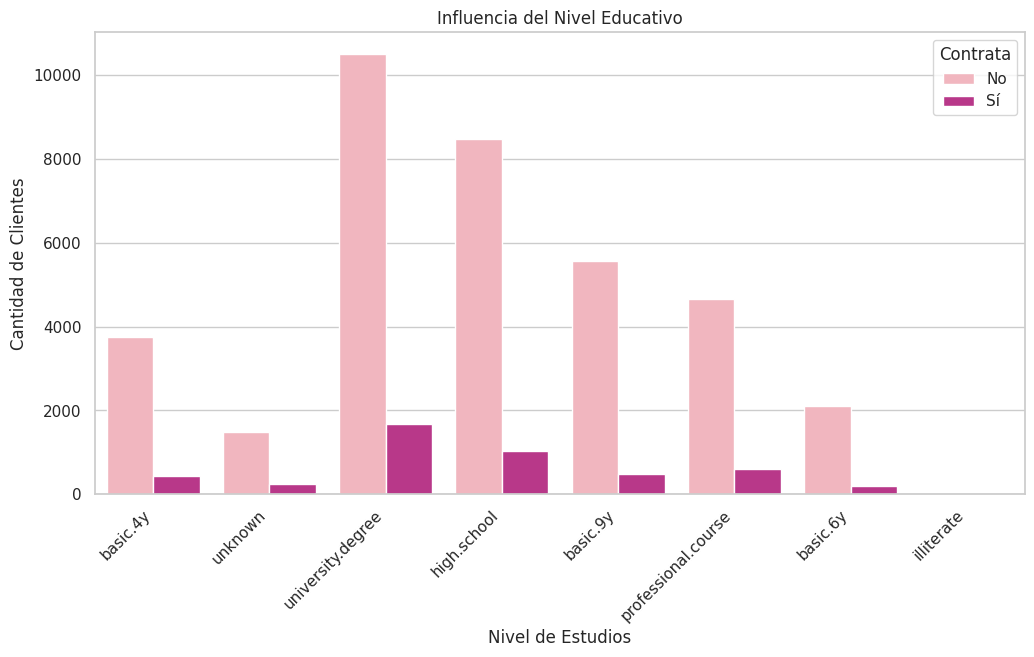

In [8]:
plt.figure(figsize=(12, 6))

# Gráfica: Educación vs Resultado
sns.countplot(x='education', hue='y', data=df_train, palette='RdPu')

# Rotamos etiquetas para que se lean bien
plt.xticks(rotation=45, ha='right')
plt.title('Influencia del Nivel Educativo')
plt.xlabel('Nivel de Estudios')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Contrata', labels=['No', 'Sí'])
plt.show()

<div style="background-color: #fff0f5; border: 1px solid #ffdeeb; border-left: 5px solid #cc7b99ff; border-radius: 5px; padding: 20px; font-family: sans-serif; line-height: 1.6; color: #555;">

<h3 style="color: #da80b0ff; margin-top: 0; border-bottom: 2px solid #ffdeeb; padding-bottom: 10px;">
        Influencia del Nivel Educativo
    </h3>

<div style="background-color: white; padding: 15px; border-radius: 5px; border-left: 3px solid #f06292; margin-bottom: 15px; box-shadow: 0 2px 4px rgba(0,0,0,0.02);">
        <h4 style="color: #ad1457; margin-top: 0; margin-bottom: 5px;">Dominio Universitario</h4>
        <ul style="margin-top: 5px; margin-bottom: 0; padding-left: 20px;">
            <li>El segmento <b>university.degree</b> no solo es el más numeroso en la base de datos, sino también el que registra, con diferencia, el mayor volumen absoluto de contrataciones (barras rosas oscuras).</li>
        </ul>
    </div>

<div style="background-color: white; padding: 15px; border-radius: 5px; border-left: 3px solid #f06292; margin-bottom: 20px; box-shadow: 0 2px 4px rgba(0,0,0,0.02);">
        <h4 style="color: #ad1457; margin-top: 0; margin-bottom: 5px;">Educación Básica vs. Superior</h4>
        <ul style="margin-top: 5px; margin-bottom: 0; padding-left: 20px;">
            <li>Observamos una tendencia ascendente: a medida que aumenta el nivel educativo (de <i>basic.4y</i> a <i>professional.course</i> y <i>university</i>), aumenta la propensión a aceptar el crédito.</li>
        </ul>
    </div>

<div style="background-color: #fce4ec; padding: 10px; border-radius: 4px; border: 1px solid #f8bbd0; text-align: center;">
        <span style="font-size: 0.95em;">
           Los clientes con mayor formación tienden a tener mayor estabilidad financiera y capacidad de ahorro, lo que los convierte en objetivo
        </span>
    </div>

</div>

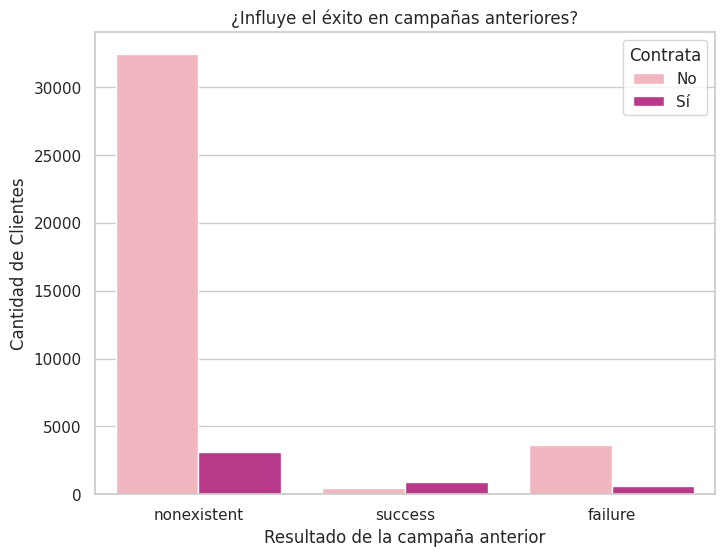

In [9]:
plt.figure(figsize=(8, 6))

# Gráfica: Resultado Anterior vs Resultado Actual
sns.countplot(x='poutcome', hue='y', data=df_train, palette='RdPu')

plt.title('¿Influye el éxito en campañas anteriores?')
plt.xlabel('Resultado de la campaña anterior')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Contrata', labels=['No', 'Sí'])
plt.show()

<div style="background-color: #fff0f5; border: 1px solid #ffdeeb; border-left: 5px solid #c2185b; border-radius: 5px; padding: 20px; font-family: sans-serif; line-height: 1.6; color: #555;">
<p style="margin-bottom: 15px;">
        Analizamos cómo influye el resultado de la campaña de marketing anterior en la decisión actual:
    </p>
<div style="background-color: white; padding: 15px; border-radius: 5px; border-left: 3px solid #f48fb1; margin-bottom: 15px; box-shadow: 0 2px 4px rgba(0,0,0,0.02);">
        <h4 style="color: #c2185b; margin-top: 0; margin-bottom: 5px;">"Success"</h4>
        <ul style="margin-top: 5px; margin-bottom: 0; padding-left: 20px;">
            <li>Aunque son pocos clientes en total, la barra rosa oscura (SÍ) es casi tan alta como la clara (NO)</li>
            <li>Es probable que vuelva a hacerlo</li>
        </ul>
    </div>

<div style="background-color: white; padding: 15px; border-radius: 5px; border-left: 3px solid #f48fb1; margin-bottom: 20px; box-shadow: 0 2px 4px rgba(0,0,0,0.02);">
        <h4 style="color: #c2185b; margin-top: 0; margin-bottom: 5px;">"Nonexistent" y "Failure"</h4>
        <ul style="margin-top: 5px; margin-bottom: 0; padding-left: 20px;">
            <li><b>Nonexistent:</b> La inmensa mayoría de clientes son nuevos (nunca contactados antes). Aquí la tasa de éxito es muy baja</li>
            <li><b>Failure:</b> Si ya nos dijeron que NO en el pasado, es difícil hacerles cambiar de opinión, aunque la tasa es ligeramente mejor que en los contactos nuevos.</li>
        </ul>
    </div>

<div style="background-color: #fce4ec; padding: 10px; border-radius: 4px; border: 1px solid #f8bbd0; text-align: center;">
        <span style="font-size: 0.95em;">
            Esta variable es <b>oro puro</b> para el algoritmo. Probablemente sea la "Feature" con mayor peso predictivo. El modelo aprenderá rápido la regla: <i>"Si poutcome = success -> Predice SÍ"</i>.
        </span>
    </div>

</div>

<Figure size 1200x1200 with 0 Axes>

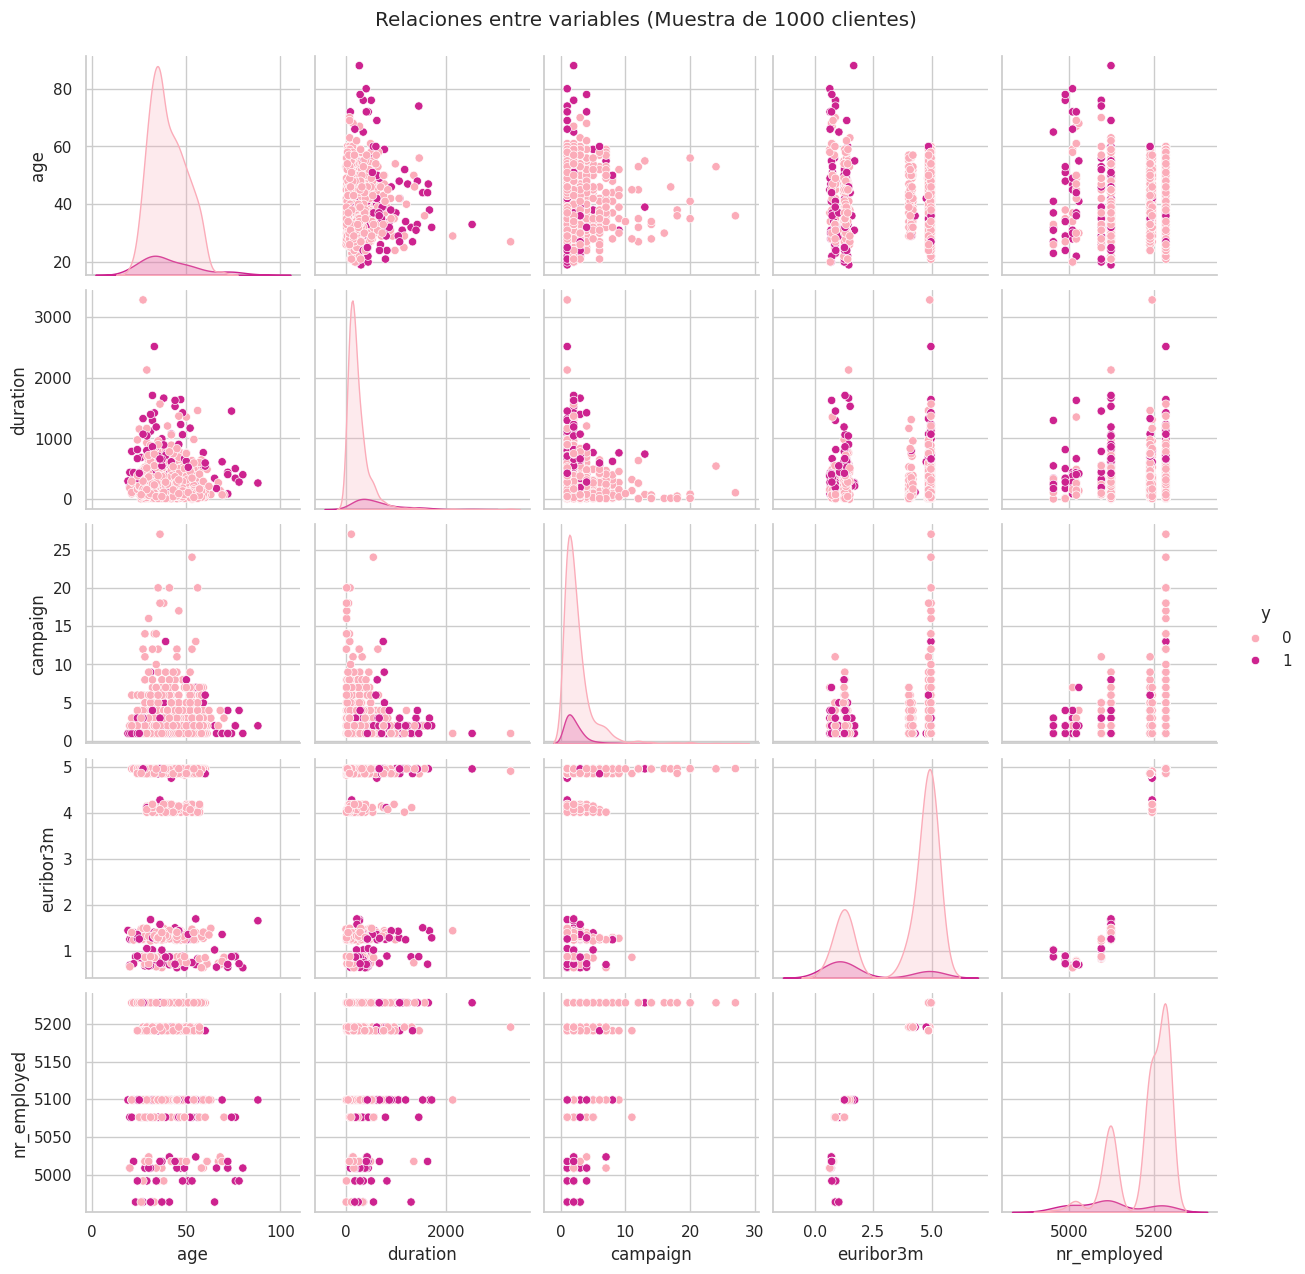

In [10]:


cols_interesantes = ['age', 'duration', 'campaign', 'euribor3m', 'nr_employed', 'y']

# Cogemos una muestra de 1000 clientes al azar
df_sample = df_train[cols_interesantes].sample(n=1000, random_state=42)

plt.figure(figsize=(12, 12))

sns.pairplot(df_sample, hue='y', palette='RdPu', diag_kind='kde')

plt.suptitle("Relaciones entre variables (Muestra de 1000 clientes)", y=1.02)
plt.show()

<div style="background-color: #e9aec2ff; border: 1px solid #ffdeeb; border-left: 5px solid #b15b7bff; border-radius: 5px; padding: 20px; font-family: sans-serif; line-height: 1.6; color: #555;">

<div style="background-color: white; padding: 15px; border-radius: 5px; border-left: 3px solid #b65777ff; margin-bottom: 15px;">
        <h4 style="color: #9c496dff; margin-top: 0; margin-bottom: 5px;">1. La duración importa mucho (Duration)</h4>
        <ul style="margin-top: 5px; margin-bottom: 0; padding-left: 20px;">
            <li>Es lo que más llama la atención. Los puntos oscuros (los que compran) se van hacia la derecha, donde la duración es alta.</li>
            <li><b>Conclusión:</b> Básicamente, si la llamada dura muy poco, es casi imposible venderles el crédito. Necesitas tiempo para convencerlos.</li>
        </ul>
    </div>

<div style="background-color: white; padding: 15px; border-radius: 5px; border-left: 3px solid #a34464ff; margin-bottom: 15px;">
        <h4 style="color: #aa3f6dff; margin-top: 0; margin-bottom: 5px;">2.(Euribor y Empleados)</h4>
        <ul style="margin-top: 5px; margin-bottom: 0; padding-left: 20px;">
            <li>En las gráficas del <code>euribor3m</code> y <code>nr_employed</code>, se ve que la mayoría de los puntos oscuros se acumulan en la parte baja.</li>
            <li><b>Conclusión:</b> Parece que es más fácil que la gente acepte cuando los intereses (Euribor) están bajos. Si están altos, la gente rechaza más.</li>
        </ul>
    </div>

<div style="background-color: white; padding: 15px; border-radius: 5px; border-left: 3px solid #b85375ff; margin-bottom: 15px;">
        <h4 style="color: #a1466dff; margin-top: 0; margin-bottom: 5px;">3. (Age)</h4>
        <ul style="margin-top: 5px; margin-bottom: 0; padding-left: 20px;">
            <li>Aquí está todo muy mezclado. Hay puntos claros y oscuros por todas partes.</li>
            <li><b>Conclusión:</b> La edad por sí sola no sirve de mucho para diferenciar, compran y rechazan por igual tengas la edad que tengas.</li>
        </ul>
    </div>

</div>9

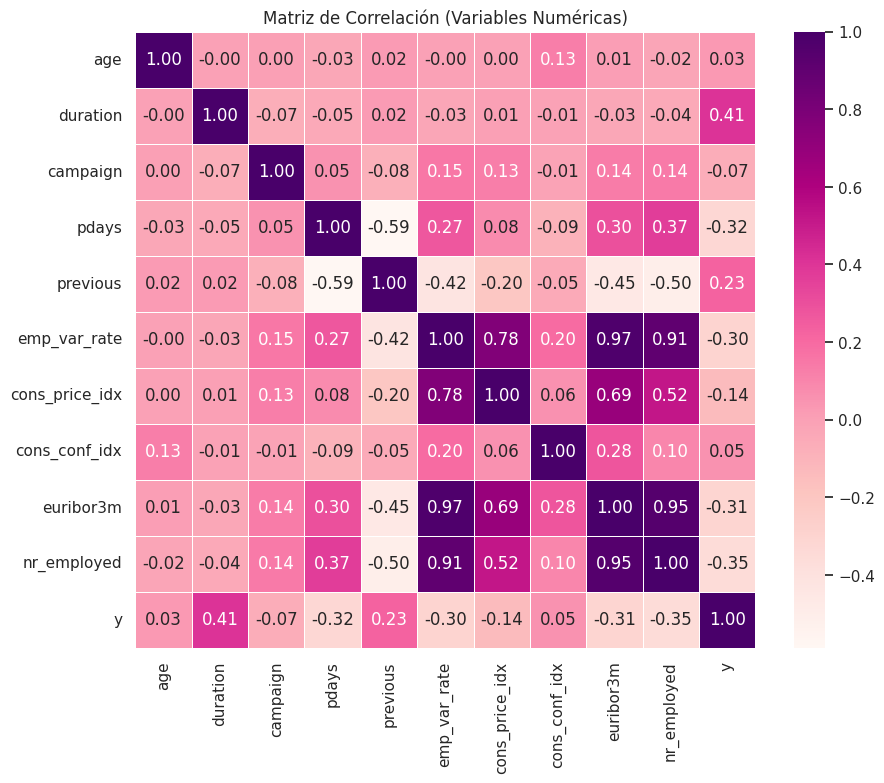

In [11]:
# Filtramos solo las columnas numéricas
df_numeric = df_train.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='RdPu', fmt=".2f", linewidths=0.5)

plt.title("Matriz de Correlación (Variables Numéricas)")
plt.show()

<div style="background-color: #e6b3c4ff; border: 1px solid #ffdeeb; border-left: 5px solid #d81b60; border-radius: 5px; padding: 20px; font-family: sans-serif; line-height: 1.6; color: #555;">

<h3 style="color: #880e4f; margin-top: 0; border-bottom: 2px solid #ffdeeb; padding-bottom: 10px;">
        Análisis de la Matriz de Correlación
    </h3>
<div style="background-color: white; padding: 15px; border-radius: 5px; border-left: 3px solid #f06292; margin-bottom: 15px;">
        <h4 style="color: #ad1457; margin-top: 0; margin-bottom: 5px;">1. Relación con la Variable Objetivo (y)</h4>
        <ul style="margin-top: 5px; margin-bottom: 0; padding-left: 20px;">
            <li><b>Correlación Positiva Moderada (0.4) por 'duration':</b> La variable <code>duration</code> existe una relación : a mayor duración de la llamada, mayor probabilidad de éxito en la contratación.</li>
            <li><b>Correlación Negativa (Factores Económicos): las variables como <code>euribor3m</code> o <code>nr_employed</code> (color pálido)
                la correlación es negativa moderada. Cuando el Euribor sube (economía cara), la contratación baja.
        </ul>
    </div>

<div style="background-color: white; padding: 15px; border-radius: 5px; border-left: 3px solid #f06292; margin-bottom: 15px;">
        <h4 style="color: #ad1457; margin-top: 0; margin-bottom: 5px;">2. Multicolinealidad (Redundancia)</h4>
        <ul style="margin-top: 5px; margin-bottom: 0; padding-left: 20px;">
            <li>Destaca un bloque <b>morado muy oscuro</b> en el centro de la matriz, conectando <code>emp.var.rate</code>, <code>euribor3m</code> y <code>nr_employed</code>.</li>
            <li> Sus coeficientes son casi perfectos (> 0.90). Esto nos indica que las tres variables nos cuentan la misma historia macroeconómica. Para el modelo, esto es información duplicada (redundante) que deberemos vigilar.</li>
        </ul>
    </div>
</div>

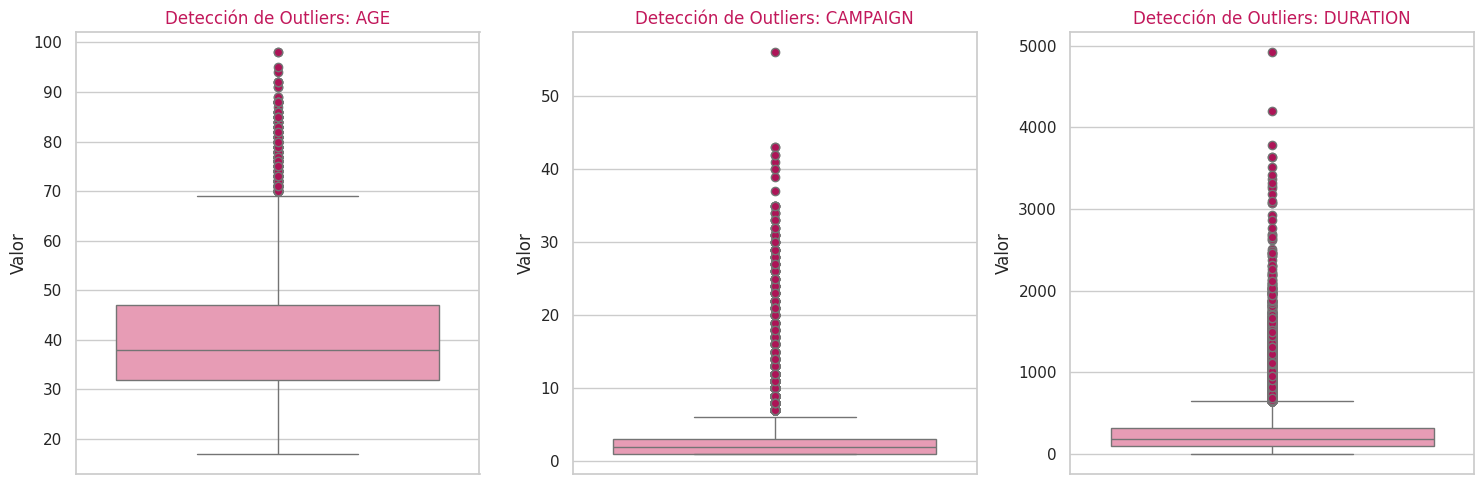

In [12]:
vars_outliers = ['age', 'campaign', 'duration']

plt.figure(figsize=(15, 5))

for i, col in enumerate(vars_outliers):
    plt.subplot(1, 3, i+1)
    # Usamos boxplot con color rosa
    sns.boxplot(y=df_train[col], color='#f48fb1', flierprops={'markerfacecolor': '#ad1457', 'marker': 'o'})
    plt.title(f'Detección de Outliers: {col.upper()}', fontsize=12, color='#c2185b')
    plt.ylabel('Valor')

plt.tight_layout()
plt.show()

<div style="background-color: #eaa6bdff; border: 1px solid #ffdeeb; border-left: 5px solid #a23b61ff; border-radius: 5px; padding: 20px; font-family: sans-serif; line-height: 1.6; color: #555;">

<h3 style="color: #880e4f; margin-top: 0; border-bottom: 2px solid #ffdeeb; padding-bottom: 10px;">
        Análisis de Valores Atípicos (Outliers)
    </h3>

<p style="margin-bottom: 15px;">
        Utilizamos diagramas de caja (Boxplots) para identificar valores extremos que se desvían de la normalidad.
    </p>

<div style="background-color: white; padding: 15px; border-radius: 5px; border-left: 3px solid #ec407a; margin-bottom: 15px;">
        <h4 style="color: #ad1457; margin-top: 0; margin-bottom: 5px;">1. Edad (Age)</h4>
        <ul style="margin-top: 5px; margin-bottom: 0; padding-left: 20px;">
            <li>Vemos bastantes puntos por encima de los 65-70 años.</li>
            <li><b>Decisión:</b> NO los borramos. Tener más de 70 años no es un error. Son personas reales (probablemente jubilados) que pueden querer invertir sus ahorros. Si los borramos, perdemos información sobre este perfil de cliente.</li>
        </ul>
    </div>

<div style="background-color: white; padding: 15px; border-radius: 5px; border-left: 3px solid #ec407a; margin-bottom: 15px;">
        <h4 style="color: #ad1457; margin-top: 0; margin-bottom: 5px;">2. Duration (Duración)</h4>
        <ul style="margin-top: 5px; margin-bottom: 0; padding-left: 20px;">
            <li>Aparecen llamadas largas.</li>
            <li><b>Decisión:</b> NO eliminar. Una llamada larga suele implicar interés y venta. Si borramos estos datos, eliminamos precisamente los casos de éxito (clase 'Yes'). El modelo necesita verlos.</li>
        </ul>
    </div>

<div style="background-color: white; padding: 15px; border-radius: 5px; border-left: 3px solid #ec407a; margin-bottom: 15px;">
        <h4 style="color: #ad1457; margin-top: 0; margin-bottom: 5px;">3. Campaign (Número de contactos)</h4>
        <ul style="margin-top: 5px; margin-bottom: 0; padding-left: 20px;">
            <li>Vemos casos extremos de hasta 40-50 llamadas a una misma persona.</li>
            <li><b>Decisión:</b> Posible tratamiento. Llamar 50 veces a alguien parece un error de procedimiento o datos "sucios", ya que es improbable que alguien compre tras ser "acosado" tantas veces. Podríamos plantearnos limitar esta variable en el preprocesado.</li>
        </ul>
    </div>
    
    
<div style="background-color: #fce4ec; padding: 10px; border-radius: 4px; border: 1px solid #f8bbd0; text-align: center;">
        <strong style="color: #880e4f;">CONCLUSIÓN PARA MODELADO</strong><br>
        <span style="font-size: 0.95em;">
            La presencia de estos outliers fuertes justifica aún más el uso de <b>Random Forest</b> (robusto a outliers) frente a modelos más sensibles que requerirán un buen escalado (KNN/Logística). Pero veremos cual será el más eficiente al final del notebook
        </span>
    </div>

</div>

------

## 3. Preprocessing data


En esta etapa vamos a hacer 3 cosas obligatorias para que nuestros modelos funcionen:

Quitar los "unknown" (Limpieza).

Convertir datos categóricos a números (Encoding)

Poner todo en la misma escala (Escalado), que se hará en la creación de los modelos.

In [13]:

# ==========================================
# 1. LIMPIEZA DE VALORES 'unknown'
# ==========================================
# Definimos las columnas que queremos arreglar
cols_to_fix = ['job', 'marital', 'education']

# Calculamos la MODA (lo más repetido) solo en el TRAIN
modas = df_train[cols_to_fix].mode().iloc[0]

# Aplicamos esa moda al TRAIN y al TEST (para que sean iguales)
for col in cols_to_fix:
    df_train[col] = df_train[col].replace('unknown', modas[col])
    df_test[col] = df_test[col].replace('unknown', modas[col])

# ==========================================
# 2. DATOD CATEGÓRICOS
# ==========================================
# A) ORDINAL (Educación: tiene orden lógico)

educacion_map = {
    'illiterate': 0, 'basic.4y': 1, 'basic.6y': 2, 'basic.9y': 3,
    'high.school': 4, 'professional.course': 5, 'university.degree': 6,
    'unknown': 1 
}
df_train['education'] = df_train['education'].map(educacion_map)
df_test['education'] = df_test['education'].map(educacion_map)

# B) ONE-HOT ENCODING (Resto: sin orden)
# Convertimos las variables categóricas en columnas de ceros y unos
cols_cat = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

df_train = pd.get_dummies(df_train, columns=cols_cat, drop_first=True)
df_test = pd.get_dummies(df_test, columns=cols_cat, drop_first=True)

# --- CORRECCIÓN DE COLUMNAS ---
# A veces, al hacer get_dummies, el Test puede tener menos columnas si le faltan categorías.
# Esto asegura que ambos tengan las mismas columnas rellenando con 0 las que falten.
df_train, df_test = df_train.align(df_test, join='outer', axis=1, fill_value=0)

# Aseguramos que la columna objetivo 'y' esté bien codificada (yes=1, no=0)
# (El align puede haber movido la 'y', así que la recasteamos por si acaso)
if 'y' in df_train.columns:
    df_train['y'] = df_train['y'].replace({'yes': 1, 'no': 0})
    df_test['y'] = df_test['y'].replace({'yes': 1, 'no': 0})



<div style="background-color: #a082a4ff; border-left: 5px solid #9c27b0; padding: 15px; border-radius: 5px;">
    <h3 style="color: #6a1b9a;">Preprocesado de Datos</h3>
    <p>En esta etapa común preparamos los datos DEL (<i>credit-train.csv</i>) para que puedan ser procesados por los modelos. Replicamos las mismas transformaciones en el conjunto de test (<i>credit-test.csv</i>) para la evaluación final.</p>
    
<h4 style="color: #8e24aa;">Pasos realizados:</h4>
    <ol>
        <li><b>Limpieza de 'Unknown':</b> En variables (<i>job, marital</i>) sustituimos los valores desconocidos por la <b>Moda</b>, asumiendo que es lo más probable.</li>
        <li><b>Datos categóricos (Encoding):</b>
            <ul>
                <li>Para <b>Education</b> usamos un mapeo manual (Ordinal) porque existe una jerarquía (Universidad > Secundaria > Primaria).</li>
                <li>Para el resto de categóricas 
(<i>job, marital...</i>) usamos <b>One-Hot Encoding</b> (get_dummies), convirtiéndolas en columnas binarias (0/1).</li>
            </ul>
        </li>
        <li><b>Escalado (StandardScaler):</b>
            <ul>
                <li>Estandarizamos las variables numéricas para que tengan media 0 y desviación 1.</li>
                <li><b>Justificación:</b> Esto es <u>obligatorio</u> para algoritmos como <b>KNN</b> y <b>Regresión Logística</b>, que son sensibles a las magnitudes (si no escalamos, variables grandes como 'duration' anularían a variables pequeñas como 'age').</li>
            </ul>
        </li>
    </ol>
</div>

---------

## 4. Creación del modelo y división del dataset

In [14]:
# 1. DIVISIÓN DEL DATASET (Separación de Features X y Target y)
# -----------------------------------------------------------
X_train = df_train.drop(columns=['y'])
y_train = df_train['y']

X_test = df_test.drop(columns=['y'])
y_test = df_test['y']

# 2. ESCALADO (Necesario antes de crear el modelo)
# -----------------------------------------------------------
cols_num = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 
            'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'education']

scaler = StandardScaler()
scaler.fit(X_train[cols_num]) 

# Transformamos
X_train[cols_num] = scaler.transform(X_train[cols_num])
X_test[cols_num] = scaler.transform(X_test[cols_num])

# 3. CREACIÓN DE LOS MODELOS
# -----------------------------------------------------------
# Modelo 1: KNN
model_knn = KNeighborsClassifier(n_neighbors=5)

# Modelo 2: Regresión Logística
model_lr = LogisticRegression(penalty='l2')

# Modelo 3: Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
print(f"Dimensiones X_train: {X_train.shape}")

Dimensiones X_train: (41188, 45)


Buscamos el mejor k para nuestro modelo KNN

Calculando el mejor K usando Validación Cruzada...


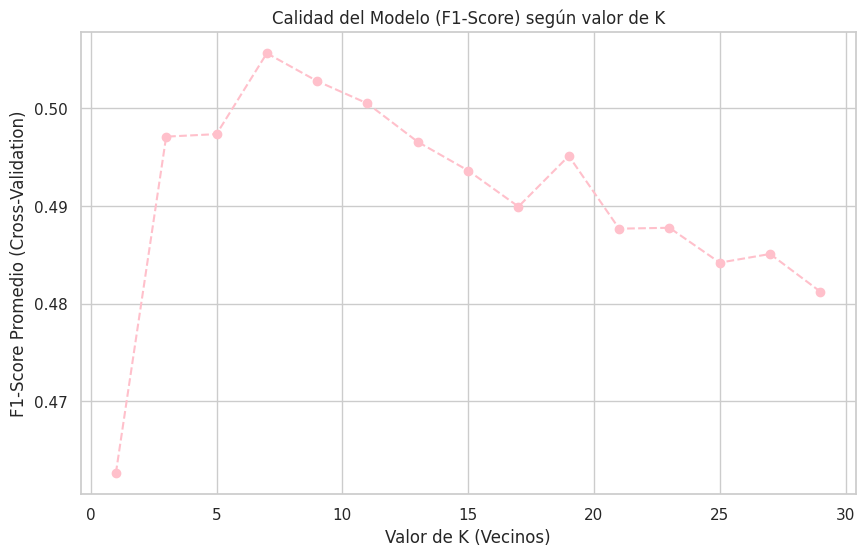

El valor óptimo de K (más estable) es: 7


In [15]:

# Rango de K a probar (solo impares para evitar empates)
# range(1, 30, 2) significa: 1, 3, 5, 7... hasta 29
k_range = range(1, 30, 2)
k_scores = []

print("Calculando el mejor K usando Validación Cruzada...")

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # cv=5 significa que entrena 5 veces dividiendo los datos de forma distinta y hace la media
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='f1')
    k_scores.append(scores.mean())


plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o', color='pink', linestyle='dashed')
plt.title('Calidad del Modelo (F1-Score) según valor de K')
plt.xlabel('Valor de K (Vecinos)')
plt.ylabel('F1-Score Promedio (Cross-Validation)')
plt.grid(True)
plt.show()

best_k = k_range[np.argmax(k_scores)]
print(f"El valor óptimo de K (más estable) es: {best_k}")
model_knn = KNeighborsClassifier(n_neighbors=best_k)



    
<p>En esta fase estructuramos los datos y definimos las herramientas algorítmicas que utilizaremos:</p>

<h4 style="color: #c015a9ff;">1. División de Variables (Features vs Target)</h4>
    <p>Para el aprendizaje supervisado, es obligatorio separar el dataset en dos estructuras:</p>
    <ul>
        <li><b>Matriz X (Features):</b> Contiene toda la información del cliente (edad, trabajo, euribor...). Son los datos que el modelo "verá".</li>
        <li><b>Vector y (Target):</b> Contiene la respuesta correcta (¿Contrató?: Sí/No). Es lo que el modelo debe aprender a predecir.</li>
    </ul>
    <h4 style="color: #8c309aff;">2. Escalado de Datos (StandardScaler)</h4>
    <p>Aplicamos una estandarización matemática a las variables numéricas.
    <br><i>Justificación Técnica:</i> Algoritmos como el <b>KNN</b> calculan distancias matemáticas. Si no escalamos, una variable con valores grandes (ej: <i>Duration</i> ~ 1000) dominaría completamente a una pequeña (ej: <i>Age</i> ~ 30), haciendo que el modelo ignore la edad. El escalado pone a todas las variables en igualdad de condiciones.</p>
    <h4 style="color: #b159beff;">3. Selección de Algoritmos</h4>
    <p>Hemos instanciado (creado) tres modelos de familias diferentes para comparar su rendimiento:</p>
    <ul>
        <li><b>KNN (K-Nearest Neighbors):</b> Basado en distancia y similitud.</li>
        <li><b>Regresión Logística:</b> Basado en probabilidad estadística.</li>
        <li><b>Random Forest:</b> Basado en reglas de decisión y ensamblaje (árboles).</li>
    </ul>


--------

## 5. Entrenamiento

In [16]:

# 1. Entrenar KNN
# El algoritmo memoriza las posiciones de los vecinos
model_knn.fit(X_train, y_train)
print("KNN entrenado correctamente.")

# 2. Entrenar Regresión Logística
# El algoritmo calcula los coeficientes (pesos) de la fórmula matemática
model_lr.fit(X_train, y_train)
print("Regresión Logística entrenada correctamente.")

# 3. Entrenar Random Forest
# El algoritmo construye los 100 árboles de decisión
model_rf.fit(X_train, y_train)
print("Random Forest entrenado correctamente.")

KNN entrenado correctamente.
Regresión Logística entrenada correctamente.
Random Forest entrenado correctamente.


----------

## 6. Análisis de resultados

<div style="background-color:#ffe6f0; border:2px solid #ff99cc; border-radius:12px; padding:16px; font-family:Arial">

<p style="color:#b30059; font-size:16px;">
La matriz de confusión nos muestra que el modelo es 
<strong style="color:#ff3385;">muy bueno detectando a las personas que NO quieren el crédito</strong>, 
lo cual se refleja en el 
<strong>cuadro azul oscuro situado en la parte superior izquierda</strong> 
(<em>Verdaderos Negativos</em>).
</p>

<p style="color:#b30059; font-size:16px;">
Sin embargo, el 
<strong style="color:#cc0066;">cuadro inferior izquierdo</strong>, correspondiente a los 
<strong>Falsos Negativos</strong>, resulta preocupante, ya que representa a 
<strong>clientes que sí querían adquirir el crédito pero que el modelo clasificó incorrectamente</strong>.
</p>

<p style="color:#800040; font-size:15px;">
Este tipo de error puede suponer una pérdida de oportunidades de negocio, por lo que sería recomendable
ajustar el modelo para reducir este tipo de fallos.
</p>

</div>

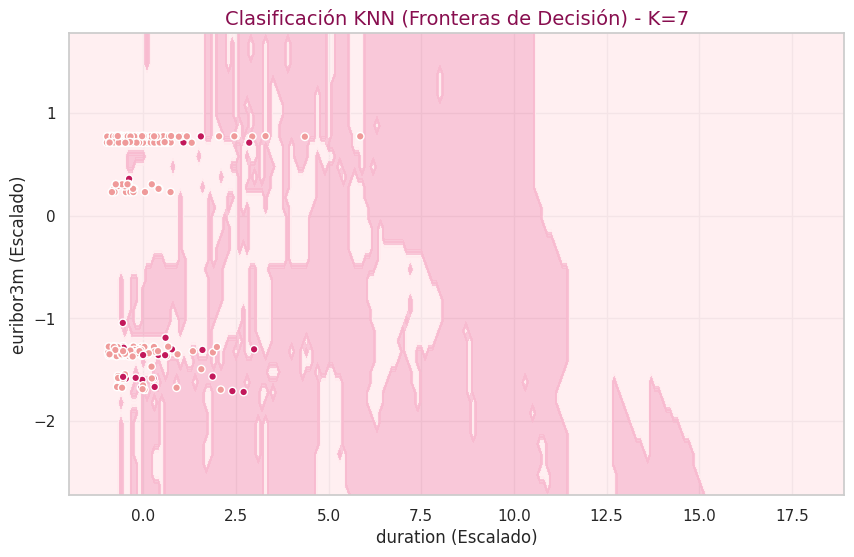

In [17]:
# --- VISUALIZACIÓN: FRONTERAS DE DECISIÓN (KNN) ---
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 1. CONFIGURACIÓN
# Usamos las 2 variables más importantes para poder dibujar en 2D
var1 = 'duration'   # Eje X
var2 = 'euribor3m'  # Eje Y

# Re-entrenamos un mini-modelo solo con 2 variables para la foto
X_vis = X_train[[var1, var2]].values
y_vis = y_train.values

knn_vis = KNeighborsClassifier(n_neighbors=best_k) # Usamos tu K optimizado
knn_vis.fit(X_vis, y_vis)

# 2. CREAMOS EL MAPA (MALLA)
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                    np.arange(y_min, y_max, 0.1))

# 3. PREDECIMOS EL COLOR DE FONDO
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 4. PINTAMOS
plt.figure(figsize=(10, 6))

# Colores Rosas
cmap_light = ListedColormap(['#ffebee', '#f8bbd0']) # Fondo claro
cmap_bold = ListedColormap(['#ef9a9a', '#c2185b'])  # Puntos fuertes

plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8) # Fondo
plt.scatter(X_vis[:300, 0], X_vis[:300, 1], c=y_vis[:300], 
            cmap=cmap_bold, edgecolor='white', s=30) # Puntos (solo 300)

plt.title(f'Clasificación KNN (Fronteras de Decisión) - K={best_k}', fontsize=14, color='#880e4f')
plt.xlabel(f'{var1} (Escalado)')
plt.ylabel(f'{var2} (Escalado)')
plt.show()

Regresión Logística

In [18]:
model_lr.intercept_

array([-3.09101096])

In [19]:
model_lr.coef_

array([[ 5.32598147e-03, -1.09999694e-01,  6.74547725e-02,
         1.06306369e+00, -6.13361141e-01, -1.19703191e-01,
         5.76496857e-02,  1.03473308e-01,  1.81413011e-01,
        -2.86849696e-01, -9.30512047e-03,  1.21907561e+00,
         6.33114500e-02, -2.51536402e+00,  7.74231592e-01,
        -4.21531266e-02, -1.11056482e-02, -2.43872003e-01,
        -1.79217834e-01, -2.52113933e-02, -4.71813740e-02,
         2.85803714e-01, -1.58432777e-01, -1.76503107e-01,
         1.74700223e-01, -2.84210491e-02,  3.88999837e-04,
        -4.21531266e-02, -4.95911267e-02,  5.60777846e-03,
         7.33195192e-02,  7.38347568e-01,  1.88979044e-01,
         9.24571331e-02, -4.52681825e-01,  1.83456216e+00,
        -5.30876755e-01, -5.18489764e-01,  2.01183997e-02,
         1.31412905e-01,  6.81729193e-02, -1.77510622e-01,
         4.35900534e-01,  9.48881120e-01, -2.86860480e-02]])

In [20]:
model_lr.score(X_test, y_test)

0.9295945617868414


<div style="background-color:#ffe6f0; border:2px solid #ff99cc; border-radius:12px; padding:16px; font-family:Arial">

<p style="color:#b30059; font-size:16px;">
El modelo de <strong>Regresión Logística</strong> obtiene una 
<strong style="color:#ff3385;">exactitud del 93%</strong>, mostrando un comportamiento 
<strong>más estable que el modelo KNN</strong>.
</p>

<p style="color:#b30059; font-size:16px;">
El <strong>intercepto negativo (-3.09)</strong> indica que,
<strong>vender por teléfono es complicado</strong>, ya que la tendencia inicial del modelo
es que el cliente responda <em>“No”</em>.
</p>

<p style="color:#b30059; font-size:16px;">
Aun así, al analizar los coeficientes se observa que existen 
<strong style="color:#cc0066;">factores muy fuertes que aumentan la probabilidad de compra</strong>
(coeficientes positivos mayores a 1.8), capaces de cambiar esa tendencia inicial.
</p>

<p style="color:#800040; font-size:15px;">
Por otro lado, también aparecen 
<strong>factores externos muy negativos</strong> (coeficientes menores a -2.5) que 
<strong>reducen casi por completo las posibilidades de éxito</strong>.
</p>

</div>


Random Forest

Dibujando los primeros 3 árboles del bosque...


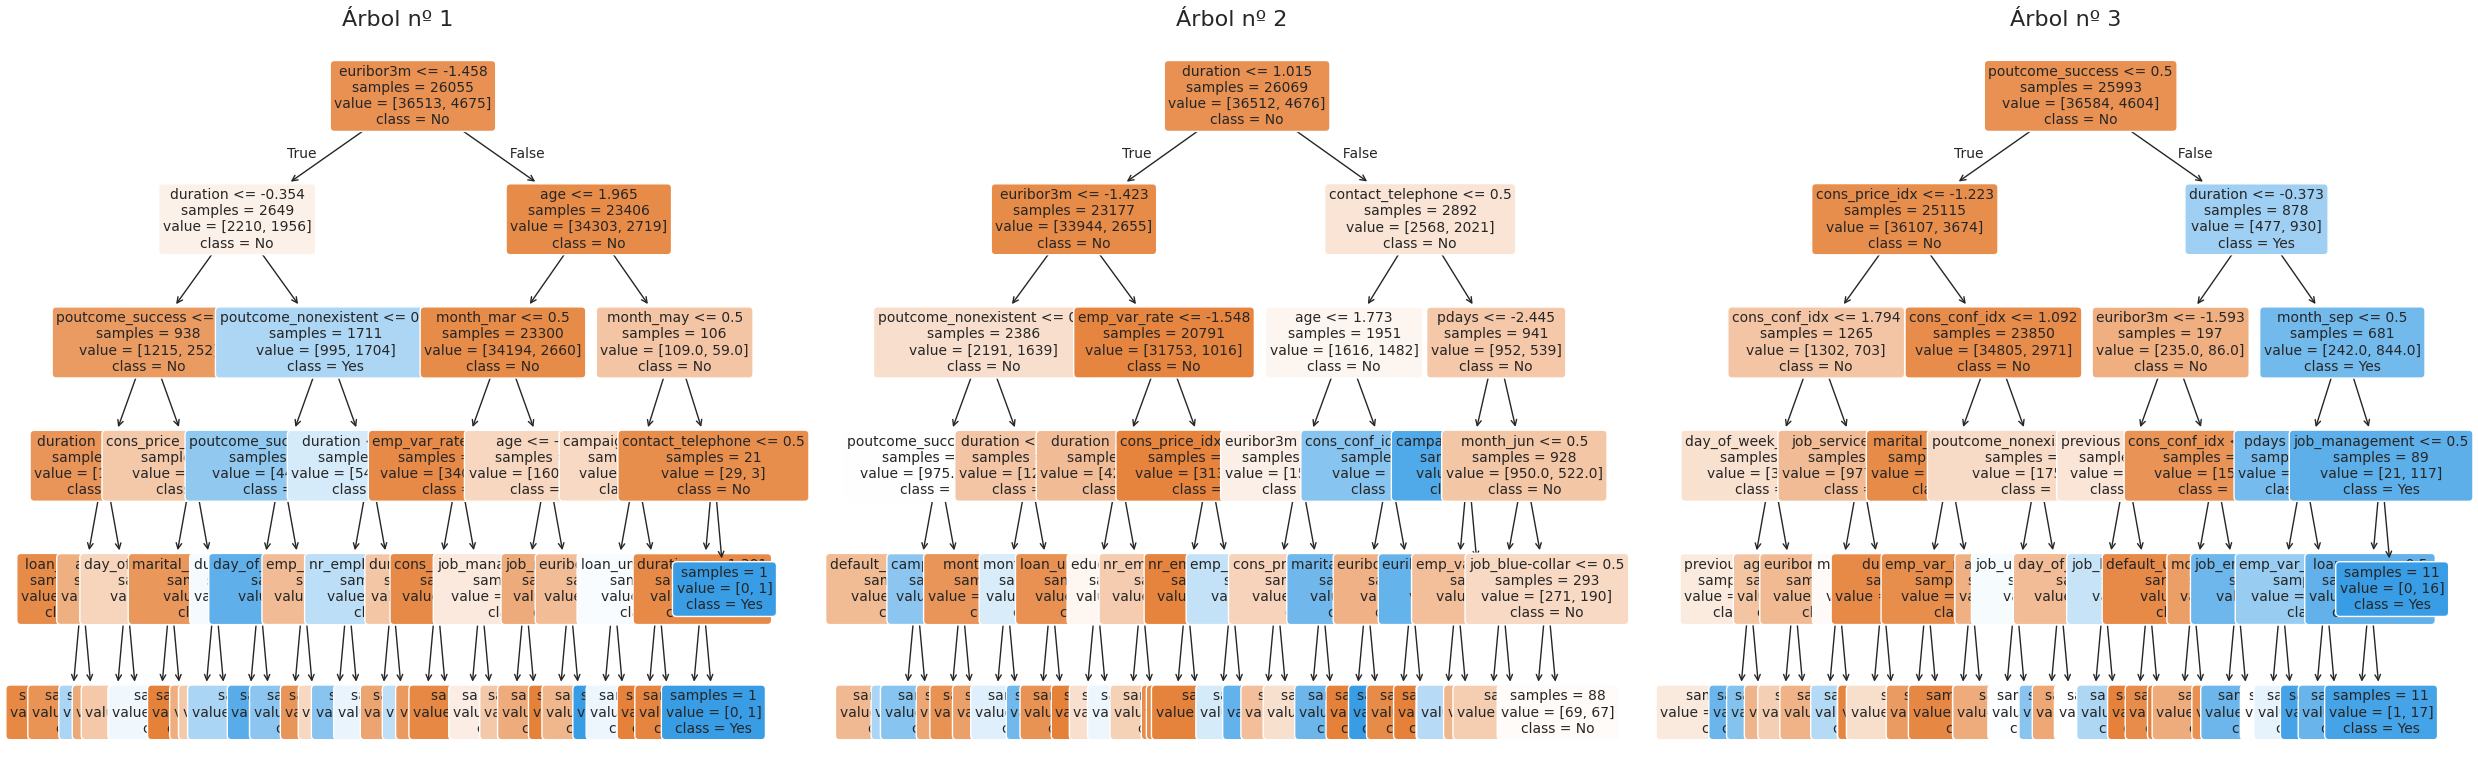

In [ ]:
# Vamos a dibujar los 3 primeros árboles
n_trees_to_plot = 3 
fig, axes = plt.subplots(1, n_trees_to_plot, figsize=(25, 8))

print(f"Dibujando los primeros {n_trees_to_plot} árboles del bosque...")

for i in range(n_trees_to_plot):
    plot_tree(
        model_rf.estimators_[i],          
        feature_names=X_train.columns, 
        class_names=['No', 'Yes'],         
        filled=True,                       
        impurity=False,                    
        rounded=True,                     
        fontsize=10,
        ax=axes[i]                        
    )
    axes[i].set_title(f"Árbol nº {i+1}", fontsize=16)

plt.tight_layout()
plt.show()

In [24]:
print("Precisión en conjunto de datos de entrenamiento: {:.3f}".format(model_rf.score(X_train, y_train)))
print("Precisión en el conjunto de datos de evaluación: {:.3f}".format(model_rf.score(X_test, y_test)))

Precisión en conjunto de datos de entrenamiento: 0.904
Precisión en el conjunto de datos de evaluación: 0.971


In [25]:
print(confusion_matrix(y_test, model_rf.predict(X_test)))

[[4000  119]
 [   0    0]]


----------

## 7. Realización de predicciones

In [22]:
y_pred_knn = model_knn.predict(X_test)

y_pred_lr = model_lr.predict(X_test)

y_pred_rf = model_rf.predict(X_test)

------------

## 8. Visualización

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from sklearn.neighbors import KNeighborsClassifier

# --- 1. PREPARACIÓN DE DATOS (Solo 2 variables para poder dibujar) ---
# Usamos 'duration' y 'euribor3m' porque son las que más influyen
# Buscamos en qué columna están dentro de tu matriz X
cols_names = list(X.columns) 
idx_dur = cols_names.index('duration')
idx_eur = cols_names.index('euribor3m')

# Cogemos los datos ESCALADOS (solo esas 2 columnas)
X_vis = X_train_scaled[:, [idx_dur, idx_eur]]
y_vis = y_train.values

# --- 2. ENTRENAMOS EL MODELO VISUAL ---
# Usamos el mismo número de vecinos que tu modelo final (ej: 19)
k_visual = 19 
clf_vis = KNeighborsClassifier(n_neighbors=k_visual)
clf_vis.fit(X_vis, y_vis)

# --- 3. CREAMOS EL MAPA DE COLOR ---
h = 0.02  # Tamaño del pixel
# Límites del gráfico
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))

# El modelo predice el color para cada punto
Z = clf_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# --- 4. DIBUJAMOS ---
plt.figure(figsize=(12, 8))

# Colores Rosas 🌸
cmap_fondo = ListedColormap(['#FFC0CB', '#DDA0DD']) # Rosa Claro (No) / Lila (Sí)
cmap_puntos = ListedColormap(['#DC143C', '#800080']) # Rojo (No) / Morado (Sí)

# Pintamos las zonas
plt.pcolormesh(xx, yy, Z, cmap=cmap_fondo, shading='auto')

# Pintamos los puntos (Una muestra de 600 para no saturar)
idx_sample = np.random.choice(len(X_vis), 600, replace=False)
plt.scatter(X_vis[idx_sample, 0], X_vis[idx_sample, 1], c=y_vis[idx_sample], 
            cmap=cmap_puntos, edgecolor='k', s=20)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Leyenda
patch0 = mpatches.Patch(color='#DC143C', label='Cliente NO (Real)')
patch1 = mpatches.Patch(color='#800080', label='Cliente SÍ (Real)')
plt.legend(handles=[patch0, patch1], loc='upper right')

plt.title(f"Visualización de Fronteras KNN (k={k_visual}) - Duración vs Euribor")
plt.xlabel("Duración Llamada (Estandarizada)")
plt.ylabel("Euribor 3M (Estandarizada)")
plt.show()

NameError: name 'X' is not defined

### Visualización de Fronteras de Decisión

Dado que nuestro modelo original trabaja con más de 20 dimensiones, es imposible representarlo gráficamente en un plano 2D. Para esta visualización, hemos generado una simplificación utilizando las dos variables con mayor correlación: **Duración de la llamada** y **Euribor**.

**Interpretación del Gráfico:**
1.  **Zonas de Color (Predicción del Modelo):**
    * **Zona Rosa Claro:** Región donde el algoritmo predice que el cliente **NO** aceptará el crédito.
    * **Zona Lila:** Región donde el algoritmo predice que **SÍ** aceptará.
    * *Observación:* Se ve claramente cómo el modelo aprende que a mayor duración (derecha) y menor Euribor (abajo), aumenta la probabilidad de éxito.

2.  **Puntos (Datos Reales):**
    * Los puntos superpuestos son una muestra de clientes reales.
    * Podemos ver cómo los puntos morados (clientes que compraron) tienden a agruparse en la zona lila, validando la lógica del modelo.